# Phân loại nhị phân với SVM

(Thuật toán và so sánh với thư viện sklearn)

***Trần Lý Bửu /tranlybuu***

### Cài đặt môi trường

In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import warnings
%matplotlib inline

### Xử lý dataset

##### Truy xuất dữ liệu và chia tập huấn luyện - kiểm thử

In [19]:
data_path = './spam_text_dataset/Data.csv'

In [20]:
def train_test_split(X, y, prop=0.25):
    index = np.random.choice(a=[False, True],
                             size=(X.shape[0],),
                             p=[prop, 1 - prop])
    X_train = X[index]
    y_train = y[index]
    X_test = X[np.invert(index)]
    y_test = y[np.invert(index)]
    return X_train, y_train, X_test, y_test

def get_data(train_file, test_file = None):
    if test_file == None:
        frame = pd.read_csv(train_file)
        data = frame.values
        np.random.shuffle(data)
        return data
    else:
        train_frame = pd.read_csv(train_file)
        test_frame = pd.read_csv(test_file)

        train_data = train_frame.values
        test_data = test_frame.values
        np.random.shuffle(train_data)
        np.random.shuffle(test_data)

        return train_data, test_data

def get_training_testing_sets(train_file, test_file = None):
    if test_file == None:
        data = get_data(train_file)
        train_data, test_data = train_test_split(data)
    else:
        train_data, test_data = get_data(train_file, test_file)
        X_train = train_data[:, 1:]
        Y_train = train_data[:, :1]
        X_test = test_data[:, 1:]
        Y_test = test_data[:, :1]

    print(X_train.shape, X_test.shape)
    
    return X_train, Y_train, X_test, Y_test

data = get_data(data_path)
m = data.shape[0]

print(data[0])

['ham' 'Oh ok i didnt know what you meant. Yep i am baby jontin']


##### Tiền xử lý dữ liệu

Xóa dữ liệu nhiễu

In [21]:
nltk.download('stopwords')
nltk.download('wordnet')
punctuations = string.punctuation
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

for i in range(m):
    data[i][1] = ''.join(j for j in data[i][1] if j not in punctuations)
    data[i][1] = ' '.join(lemmatizer.lemmatize(j.lower()) for j in data[i][1].split() if j not in stopwords)

print(data[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['ham' 'oh ok didnt know meant yep baby jontin']


Thống kê và Trực quan hóa các từ phổ biến với Word Cloud

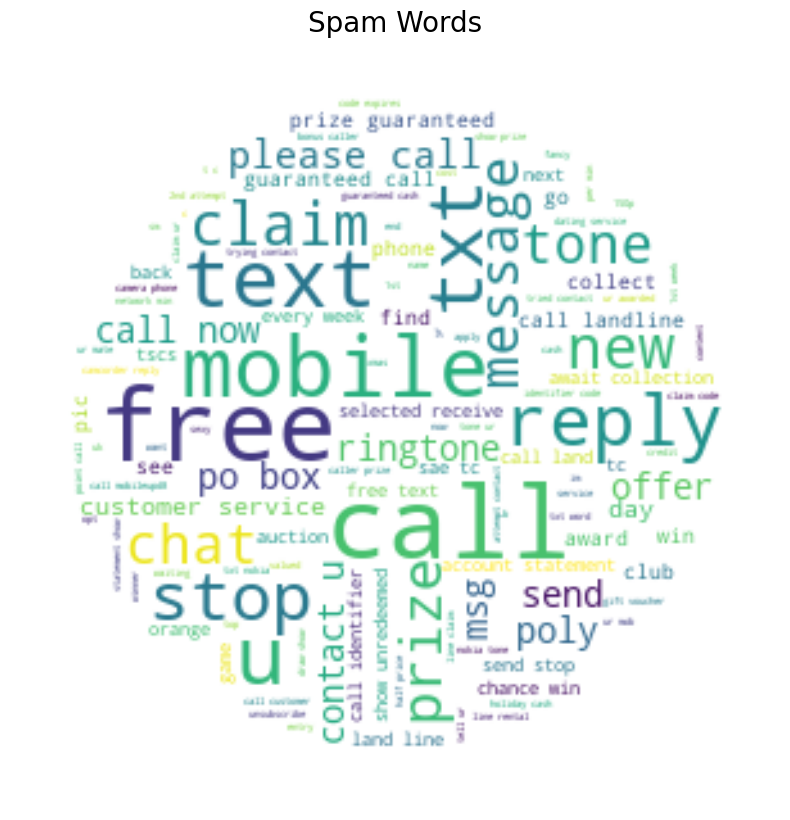

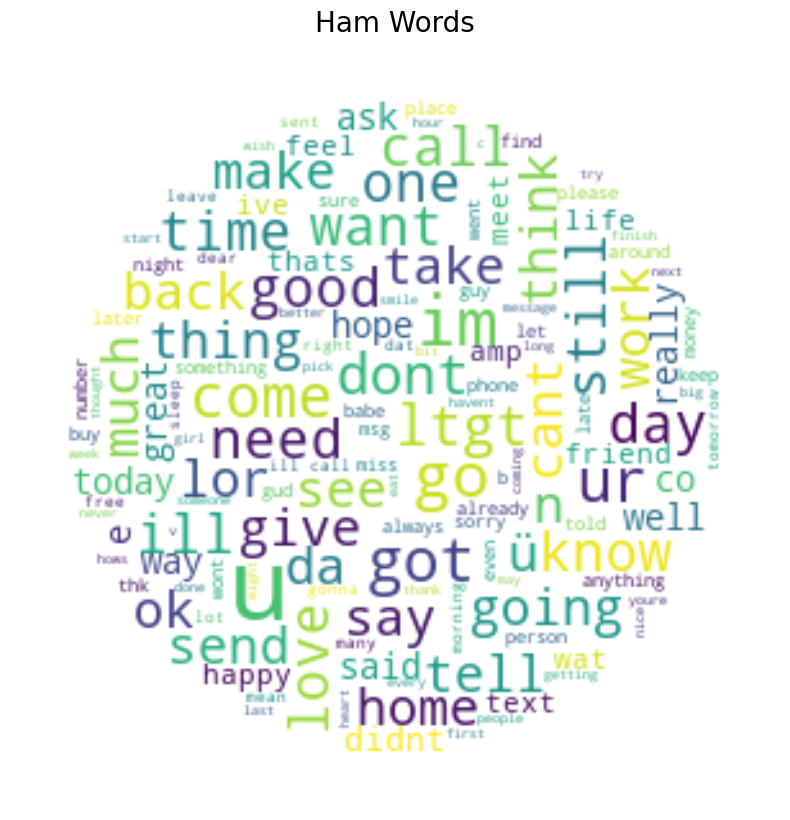

In [22]:
filtered_spam_data = ''
filtered_ham_data = ''
for i in range(data.shape[0]):
    filtered_spam_data +=' '.join(j for j in data[i][1].split() if data[i][0] == 'spam')
    filtered_ham_data +=' '.join(j for j in data[i][1].split() if data[i][0] == 'ham')

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(max_font_size=40, max_words=200, background_color='white', random_state=1337, mask=mask).generate(filtered_spam_data)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Spam Words", fontsize=20)
plt.show()

wc = WordCloud(max_font_size=40, max_words=200, background_color='white', random_state=1337, mask=mask).generate(filtered_ham_data)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Ham Words", fontsize=20)
plt.show()



##### Trích xuất đặc trưng

In [23]:
cv = TfidfVectorizer()
X = cv.fit_transform(data[:, 1])
print(X[0])

le = LabelEncoder()
Y = le.fit_transform(data[:, 0])
print(Y[0])


X_test = X[:1500, :]
X_train = X[1500:, :]

Y_test = Y[:1500]
Y_train = Y[1500:]

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

  (0, 4474)	0.5133220696136831
  (0, 1436)	0.35399104786161695
  (0, 8893)	0.41535613143197847
  (0, 5113)	0.39753260743373875
  (0, 4616)	0.23585568776875915
  (0, 2698)	0.3020578681746841
  (0, 5723)	0.23100889558212842
  (0, 5716)	0.28355939408344316
0
X_train (4072, 8985)
X_test (1500, 8985)
Y_train (4072,)
Y_test (1500,)


### Xây dựng mô hình SVM

##### Xây dựng SVM (Sử dụng thư viện có sẵn)

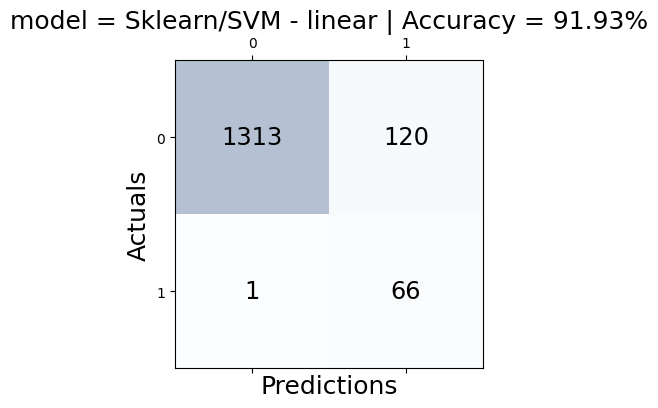

Model: Sklearn/SVM - linear
Tổng số mẫu: 1500
Tỉ lệ đúng: 91.93


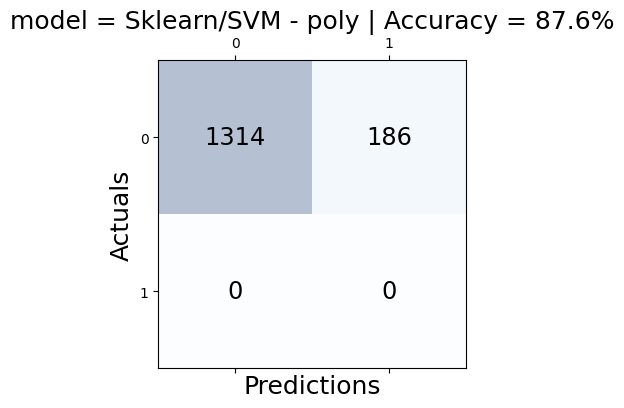

Model: Sklearn/SVM - poly
Tổng số mẫu: 1500
Tỉ lệ đúng: 87.6


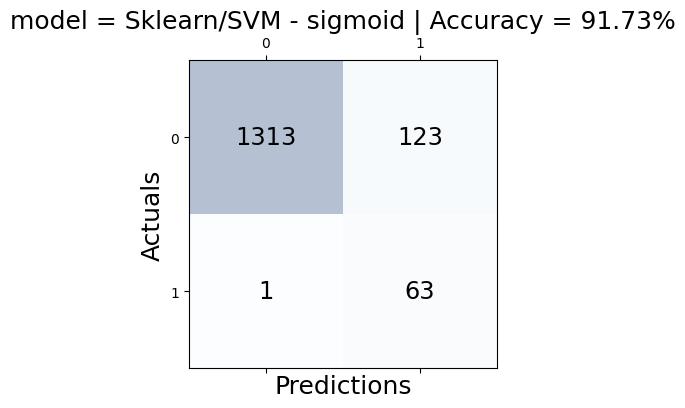

Model: Sklearn/SVM - sigmoid
Tổng số mẫu: 1500
Tỉ lệ đúng: 91.73


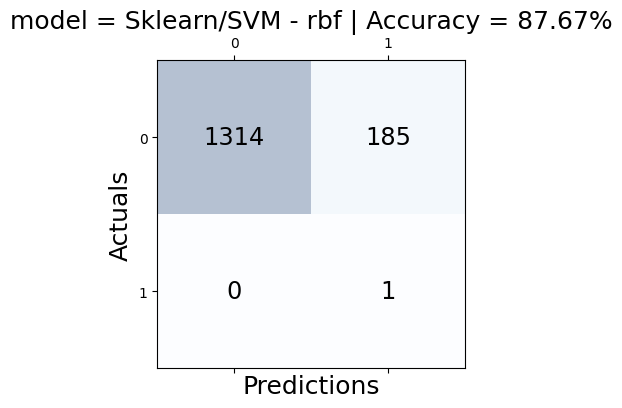

Model: Sklearn/SVM - rbf
Tổng số mẫu: 1500
Tỉ lệ đúng: 87.67


In [24]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    models = [
        (SVC(kernel = "linear", C = 0.1), 'SVM - linear'), 
        (SVC(kernel = "poly", C = 0.1), 'SVM - poly'), 
        (SVC(kernel = "sigmoid", C = 0.1), 'SVM - sigmoid'), 
        (SVC(kernel = "rbf", C = 0.1), 'SVM - rbf'), 
    ]
    for clf, name in models:
        clf.fit(X_train, Y_train)
        m_test = X_test.shape[0]
        predictions = clf.predict(X_test)
        accuracy = round(accuracy_score(predictions, Y_test), 4)*100
        confusion = confusion_matrix(predictions, Y_test)
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confusion.shape[0]):
            for j in range(confusion.shape[1]):
                ax.text(x=j, y=i,s=confusion[i, j], va='center', ha='center', size='xx-large')
        
        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title("model = Sklearn/" + name + " | " + "Accuracy = " + str(round(accuracy, 2)) + "%", fontsize=18)
        plt.show()

        print("Model: Sklearn/" + name)
        print("Tổng số mẫu:", m_test)
        print("Tỉ lệ đúng:", round(accuracy, 2))

##### Xây dựng SVM (Không sử dụng thư viện có sẵn)

In [25]:
np_X_train = np.array(X_train.todense())
np_X_test = np.array(X_test.todense())

Thuật toán

In [26]:
class SVM:
    
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters 
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                self.update(x_i, y[idx])

    def update(self,x,y):
        distance = 1 - (y * (np.dot(x, self.w) + self.b))
        hinge_loss = max(0,distance)
        if(hinge_loss == 0):
            self.w = self.w - self.lr * (2 * self.lambda_param * self.w)
        else: 
            self.w = self.w - self.lr * (2 * self.lambda_param * self.w - np.dot(x,y))
            self.b = self.b + self.lr * y
        
        
    def predict(self, X):
        eq = np.dot(X, self.w) + self.b
        return np.sign(eq)

In [27]:
clf = SVM()
clf.fit(np_X_train, Y_train)
Y_test_predicted = clf.predict(np_X_test)
print("Model: Our SVM - Linear")
print("Tổng số mẫu:", len(np_X_test))
print("Tỉ lệ đúng: " + str(round(accuracy_score(Y_test, Y_test_predicted)*100, 2)) + "%")

Model: Our SVM - Linear
Tổng số mẫu: 1500
Tỉ lệ đúng: 12.4%


In [28]:
class SVM:
  def __init__(self, kernel='linear', C=10000.0, max_iter=100, degree=3, gamma=1):
    self.kernel = {
      'poly':lambda x,y: np.dot(x, y.T)**degree,
      'rbf':lambda x,y:np.exp(-gamma*np.sum((y-x[:,np.newaxis])**2,axis=-1)),
      'linear':lambda x,y: np.dot(x, y.T),
      'sigmoid': lambda x, y: np.tanh(gamma * np.dot(x, y.T) + C)
    }[kernel]
    self.C = C
    self.max_iter = max_iter

  def restrict_to_square(self, t, v0, u):
    t = (np.clip(v0 + t*u, 0, self.C) - v0)[1]/u[1]
    return (np.clip(v0 + t*u, 0, self.C) - v0)[0]/u[0]

  def fit(self, X, y):
    self.X = X.copy()
    self.y = y * 2 - 1
    self.lambdas = np.zeros_like(self.y, dtype=float)
    self.K = self.kernel(self.X, self.X) * self.y[:,np.newaxis] * self.y
    
    for index in range(self.max_iter):
      for idxM in range(len(self.lambdas)):
        idxL = np.random.randint(0, len(self.lambdas))
        Q = self.K[[[idxM, idxM], [idxL, idxL]], [[idxM, idxL], [idxM, idxL]]]
        v0 = self.lambdas[[idxM, idxL]]
        k0 = 1 - np.sum(self.lambdas * self.K[[idxM, idxL]], axis=1)
        u = np.array([-self.y[idxL], self.y[idxM]])
        t_max = np.dot(k0, u) / (np.dot(np.dot(Q, u), u) + 1E-15)
        self.lambdas[[idxM, idxL]] = v0 + u * self.restrict_to_square(t_max, v0, u)
    
    idx, = np.nonzero(self.lambdas > 1E-15)
    self.b = np.sum((1.0-np.sum(self.K[idx]*self.lambdas, axis=1))*self.y[idx])/len(idx)
  
  def predict(self, X):
    return np.sum(self.kernel(X, self.X) * self.y * self.lambdas, axis=1) + self.b

Mô hình SVM / Linear

In [29]:
L_model = SVM(kernel='linear')
L_model.fit(np_X_train, Y_train)


 ======> Epoch 1/100

 ======> Epoch 2/100

 ======> Epoch 3/100

 ======> Epoch 4/100

 ======> Epoch 5/100

 ======> Epoch 6/100

 ======> Epoch 7/100

 ======> Epoch 8/100

 ======> Epoch 9/100

 ======> Epoch 10/100

 ======> Epoch 11/100

 ======> Epoch 12/100

 ======> Epoch 13/100

 ======> Epoch 14/100

 ======> Epoch 15/100

 ======> Epoch 16/100

 ======> Epoch 17/100

 ======> Epoch 18/100

 ======> Epoch 19/100

 ======> Epoch 20/100

 ======> Epoch 21/100

 ======> Epoch 22/100

 ======> Epoch 23/100

 ======> Epoch 24/100

 ======> Epoch 25/100

 ======> Epoch 26/100

 ======> Epoch 27/100

 ======> Epoch 28/100

 ======> Epoch 29/100

 ======> Epoch 30/100

 ======> Epoch 31/100

 ======> Epoch 32/100

 ======> Epoch 33/100

 ======> Epoch 34/100

 ======> Epoch 35/100

 ======> Epoch 36/100

 ======> Epoch 37/100

 ======> Epoch 38/100

 ======> Epoch 39/100

 ======> Epoch 40/100

 ======> Epoch 41/100

 ======> Epoch 42/100

 ======> Epoch 43/100

 ======> Epoch 44/1

In [30]:
percent = 0
for index in range(len(np_X_test)):
    prediction_value = int(L_model.predict([np_X_test[index]])[0])
    if prediction_value == (Y_test[index]):
        percent += 1
print("Model: Our SVM - Linear")
print("Tổng số mẫu:", len(np_X_test))
print("Tỉ lệ đúng: " + str(round(percent/len(np_X_test)*100, 2)) + "%")

Model: Our SVM - Linear
Tổng số mẫu: 1500
Tỉ lệ đúng: 25.47%


Mô hình SVM / Polynomial

In [31]:
P_model = SVM(kernel='poly')
P_model.fit(np_X_train, Y_train)


 ======> Epoch 1/100

 ======> Epoch 2/100

 ======> Epoch 3/100

 ======> Epoch 4/100

 ======> Epoch 5/100

 ======> Epoch 6/100

 ======> Epoch 7/100

 ======> Epoch 8/100

 ======> Epoch 9/100

 ======> Epoch 10/100

 ======> Epoch 11/100

 ======> Epoch 12/100

 ======> Epoch 13/100

 ======> Epoch 14/100

 ======> Epoch 15/100

 ======> Epoch 16/100

 ======> Epoch 17/100

 ======> Epoch 18/100

 ======> Epoch 19/100

 ======> Epoch 20/100

 ======> Epoch 21/100

 ======> Epoch 22/100

 ======> Epoch 23/100

 ======> Epoch 24/100

 ======> Epoch 25/100

 ======> Epoch 26/100

 ======> Epoch 27/100

 ======> Epoch 28/100

 ======> Epoch 29/100

 ======> Epoch 30/100

 ======> Epoch 31/100

 ======> Epoch 32/100

 ======> Epoch 33/100

 ======> Epoch 34/100

 ======> Epoch 35/100

 ======> Epoch 36/100

 ======> Epoch 37/100

 ======> Epoch 38/100

 ======> Epoch 39/100

 ======> Epoch 40/100

 ======> Epoch 41/100

 ======> Epoch 42/100

 ======> Epoch 43/100

 ======> Epoch 44/1

In [32]:
percent = 0
for index in range(len(np_X_test)):
    prediction_value = int(P_model.predict([np_X_test[index]])[0])
    if prediction_value == (Y_test[index]):
        percent += 1
print("Model: Our SVM - Polynomial")
print("Tổng số mẫu:", len(np_X_test))
print("Tỉ lệ đúng: " + str(round(percent/len(np_X_test)*100, 2)) + "%")

Model: Our SVM - Polynomial
Tổng số mẫu: 1500
Tỉ lệ đúng: 81.13%


Mô hình SVM / Sigmoid

In [33]:
S_model = SVM(kernel='sigmoid')
S_model.fit(np_X_train, Y_train)


 ======> Epoch 1/100

 ======> Epoch 2/100

 ======> Epoch 3/100

 ======> Epoch 4/100

 ======> Epoch 5/100

 ======> Epoch 6/100

 ======> Epoch 7/100

 ======> Epoch 8/100

 ======> Epoch 9/100

 ======> Epoch 10/100

 ======> Epoch 11/100

 ======> Epoch 12/100

 ======> Epoch 13/100

 ======> Epoch 14/100

 ======> Epoch 15/100

 ======> Epoch 16/100

 ======> Epoch 17/100

 ======> Epoch 18/100

 ======> Epoch 19/100

 ======> Epoch 20/100

 ======> Epoch 21/100

 ======> Epoch 22/100

 ======> Epoch 23/100

 ======> Epoch 24/100

 ======> Epoch 25/100

 ======> Epoch 26/100

 ======> Epoch 27/100

 ======> Epoch 28/100

 ======> Epoch 29/100

 ======> Epoch 30/100

 ======> Epoch 31/100

 ======> Epoch 32/100

 ======> Epoch 33/100

 ======> Epoch 34/100

 ======> Epoch 35/100

 ======> Epoch 36/100

 ======> Epoch 37/100

 ======> Epoch 38/100

 ======> Epoch 39/100

 ======> Epoch 40/100

 ======> Epoch 41/100

 ======> Epoch 42/100

 ======> Epoch 43/100

 ======> Epoch 44/1

In [34]:
percent = 0
for index in range(len(np_X_test)):
    prediction_value = int(S_model.predict([np_X_test[index]])[0])
    if prediction_value == (Y_test[index]):
        percent += 1
print("Model: Our SVM - Sigmoid")
print("Tổng số mẫu:", len(np_X_test))
print("Tỉ lệ đúng: " + str(round(percent/len(np_X_test)*100, 2)) + "%")

Model: Our SVM - Sigmoid
Tổng số mẫu: 1500
Tỉ lệ đúng: 87.6%


Mô hình SVM / Radial Basis Function (RBF) => **Chưa kiểm thử vì giới hạn dung lượng**

In [35]:
R_model = SVM(kernel='rbf')
R_model.fit(np_X_train, Y_train)

MemoryError: Unable to allocate 1.08 TiB for an array with shape (4072, 4072, 8985) and data type float64

In [ ]:
percent = 0
for index in range(len(np_X_test)):
    prediction_value = int(R_model.predict([np_X_test[index]])[0])
    if prediction_value == (Y_test[index]):
        percent += 1
print("Model: Our SVM - Radial Basis Function (RBF)")
print("Tổng số mẫu:", len(np_X_test))
print("Tỉ lệ đúng:" + str(round(percent/len(np_X_test)*100, 2)) + "%")